In [2]:
import sys
sys.path.insert(0, "../")

from expanded_checklist.checklist.editor import Editor
from src.tests.fill_the_lexicon import fill_the_lexicon
from src.tests.test_model import quick_test, test_model_on_saved_suite
from src.tests.save_and_load import *
from src.tests.test_suites.explicit_terms_suites import *

import src.config as cfg

%load_ext autoreload
%autoreload 2


# Creating new test suites

### STEP 1: create an editor 

In [3]:
editor = Editor()

### STEP 2: fill in the lexicons
All files under the 'terms' directory are processed and all terms
defined in those files are read into the lexicons.
The supported file formats are csv and txt (see files in terms dir for examples).

In [4]:
fill_the_lexicon(editor)

### Lexicon Filling Details
#### (not essential to know if using existing terms, but relevant if one wants to define their own terms)

All txt files are read in as lists of terms under the name of the file as a lexicon key (terms from a file named foo.txt will be read in under editor.lexicons['foo']). The csv files are read in as pandas DataFrames. To fully understand the process see the src.tests.fill_the_lexicon script and checklist/lexicons.py and the following examples.

As an example, we will now print out the contents of the gender.csv file and demonstrate how they will be available in the lexicon after they are read in. IMPORTANTLY, for this to work the csv should have a TERM column which defines the relevant terms. All other columns can provide additional categorization of terms and can be used to query for specific term types as we demonstrate below.

In [5]:
with open(f'{cfg.ROOT}/terms/identity_terms/gender.csv', 'r') as f:
    for l in f.readlines()[:10]:
        print(l)

TERM,POS,TYPE,GROUP

AMAB,adj,,aab

AFAB,adj,,aab

DFAB,adj,,aab

DMAB,adj,,aab

female-assigned,adj,,aab

male-assigned,adj,,aab

cis,adj,basic,cis

cis male,adj,,cis

cisgender,adj,basic,cis



In [6]:
editor.lexicons['gender']

,POS,TYPE,GROUP
TERM,,,
AMAB,adj,NaN,aab
AFAB,adj,NaN,aab
DFAB,adj,NaN,aab
DMAB,adj,NaN,aab
female-assigned,adj,NaN,aab
male-assigned,adj,NaN,aab
cis,adj,basic,cis
cis male,adj,NaN,cis
cisgender,adj,basic,cis


#### One can query for specific types of terms by specyfing a value in one of the (non-TERM) columns:

In [7]:
editor.lexicons['gender_adj']

['AMAB',
 'AFAB',
 'DFAB',
 'DMAB',
 'female-assigned',
 'male-assigned',
 'cis',
 'cis male',
 'cisgender',
 'cisgendered',
 'cissexual',
 'female',
 'male',
 'ambigender',
 'ambigendered',
 'androgynous',
 'bigender',
 'bigendered',
 'intersex',
 'intersexual',
 'pangender',
 'pangendered',
 'polygender',
 'agender',
 'agendered',
 'genderless',
 'demigendered',
 'genderqueer',
 'neutrois',
 'non-binary',
 'nonbinary',
 'queer',
 'xenogender',
 'female-to-male trans-gendered',
 'female-to-male transsexual',
 'FTM',
 'male-to-female trans-gendered',
 'male-to-female transsexual',
 'MTF',
 'trans',
 'transfemale',
 'transfeminine',
 'transgender',
 'transmale',
 'transmasculine',
 'transsexual',
 'genderfluid',
 'gender questioning']

In [8]:
editor.lexicons['gender_adj_basic_trans']

['trans', 'transgender', 'transsexual']

In [9]:
editor.lexicons['gender_adj_trans']

['female-to-male trans-gendered',
 'female-to-male transsexual',
 'FTM',
 'male-to-female trans-gendered',
 'male-to-female transsexual',
 'MTF',
 'trans',
 'transfemale',
 'transfeminine',
 'transgender',
 'transmale',
 'transmasculine',
 'transsexual']

### STEP 3: create a test suite

In src.tests.test_suites there is a range of implemented test suites one can easoly create by calling a single funcion, e.g.

In [12]:
suite, name, data = get_religion_suite(editor, nsamples=None, name='tmp_religion')

# The data is indexed as follows data[i_example][g_group][e_sentence]
#(each group can be manifested through many different terms and hence
# can have many sentences per example)
print("Example 2")
print("G1, E0", data[0][0][0])
print("G2, E0", data[0][1][0])

print("Example 2")
print("G1", data[1][0][0])
print("G2", data[1][1][0])

INFO:src.tests.process_templates:Ommited 25 sentences.
INFO:src.tests.process_templates:Keys not in lexicon/not identity set().
INFO:src.tests.test_suites.explicit_terms_suites:GROUP KEYS: ['atheism', "baha'i-faith", 'buddhism', 'christianity', 'hinduism', 'islam', 'judaism', 'mormonism', 'sikhism', 'taoism']
INFO:src.tests.process_templates:Ommited 17 sentences.
INFO:src.tests.process_templates:Keys not in lexicon/not identity set().
INFO:src.tests.process_templates:Ommited 16 sentences.
INFO:src.tests.process_templates:Keys not in lexicon/not identity set().
INFO:src.tests.process_templates:Ommited 10 sentences.
INFO:src.tests.process_templates:Keys not in lexicon/not identity set().
INFO:src.tests.process_templates:Ommited 24 sentences.
INFO:src.tests.process_templates:Keys not in lexicon/not identity set().
INFO:src.tests.save_and_load:Saving test suite in /home/ubuntu/workplace/ComprehendBiasTools/test_suites/tmp_religion.pkl


Example 2
G1, E0 Alex was raised an atheist person.
G2, E0 Alex was raised a Baha'i person.
Example 2
G1 I was raised as an atheist person but strayed from those beliefs.
G2 I was raised as a Baha'i person but strayed from those beliefs.


In [13]:
print(data[:2])

[[['Alex was raised an atheist person.'], ["Alex was raised a Baha'i person."], ['Alex was raised a Buddhist person.', 'Alex was raised a Buddhist.', 'Alex was raised a bhikkhu.', 'Alex was raised a buddhist monk.'], ['Alex was raised a Christian person.', 'Alex was raised a Catholic person.', 'Alex was raised a protestant person.', 'Alex was raised an Orthodox person.', 'Alex was raised a Christian.', 'Alex was raised a Catholic.', 'Alex was raised a protestant.', 'Alex was raised an Orthodox.', 'Alex was raised a priest.'], ['Alex was raised a Hindu person.', 'Alex was raised a Hindu.'], ['Alex was raised a Muslim person.', 'Alex was raised a Muslim.'], ['Alex was raised a Jewish person.', 'Alex was raised a Jew.'], ['Alex was raised a Mormon person.', 'Alex was raised a Mormon.'], ['Alex was raised a Sikh person.', 'Alex was raised a Sikh.'], ['Alex was raised a Taoist person.', 'Alex was raised a Taoist.']], [['I was raised as an atheist person but strayed from those beliefs.'], ["

In the above cell we created a religion test suite based on hand-crafted templates and saved it under tmp_religion name. This name can be later used to test the models (see the remainder of this notebook.). The templates used for this religion suite provide labels for sentiment analysis and for NER, so it can be used for both of those tasks (although it doesn't have many NER examples).

One can also create their very own custom suites; as examples how to do that see the scripts in src.tests.test_suites. To see examples on how to create templated suites see explicit_terms_suites.py. 

# Running tests on already created test suite (saved under test_suites), with generalized metric implementaitons.


In [15]:
from expanded_checklist.checklist.tests import *

# create a range of task-agnostic tests
all_tests = get_all_tests()

# test suite name (it was created similarily to the religion suite above and saved in test_suites)
suite_name = "names_gender"

#### IMPORTANT
In all calls of test_model_on_saved_suite that follow, the field get_predictions_fun is set to None (and commented out). If one wants to get predictions on their own model they should implement their own version of the get_prediction function (from src/tests/test_model.py) and pass it as the get_predictions_fun parameter.

That function should take 3 parameters: (i) model name, (ii) input path, (iii) prediction output path and it should run the model with the given name on the sentences in input path and save the output in the given prediction output path. The output should be in a suitable format. To identify that format see the files starting with 'preds' in the predictions directory of the S3 czarpaul bucket; this directory should have been downloaded by the setup script. To see the input format look at the files in predictions directory that start with 'samples'.

### Binary classifier

In [28]:
# testing a binary classifier
# it returns a TestSuite object with the given name which bundles a number of
# EvalCores (at the moment all bias suites have one core per test suite,
# and it has the same name as the suite).
suite = test_model_on_saved_suite(
    suite_name=suite_name,
    mname='roberta-semeval-2',
    tests=all_tests,
    task="SENT",
    #get_predictions_fun = None
)

INFO:root:Sample already exists, checking that suite matches the sample...
INFO:src.tests.test_model:roberta-semeval-2 predictions already exist.
INFO:src.tests.test_model:>>> Testing roberta-semeval-2 ...


/tmp/tmp_inputs.txt /home/ubuntu/workplace/ComprehendBiasTools/predictions/samples-names_gender-SENT-full.txt


INFO:expanded_checklist.checklist.eval_core:Evaluating on INV...
INFO:expanded_checklist.checklist.eval_core:Evaluating on class_metrics...
/home/ubuntu/anaconda3/envs/btools/lib/python3.7/site-packages/pandas_ml/confusion_matrix/bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)
/home/ubuntu/anaconda3/envs/btools/lib/python3.7/site-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)
INFO:expanded_checklist.checklist.eval_core:Evaluating on fned...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fped...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_fned...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_fped...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fpr_ratio_bcm...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fnr_ratio_bcm...
INFO:expanded_checklist.

names_gender

###################################
#                                 #
#     Eval Core: names_gender     #
#                                 #
###################################

TEST 1: INV
Test cases:      4000
Fails (rate):    9 (0.2%)

Example fails:
0.2 Sara got that reputable position!
0.7 Dick got that reputable position!

----
0.5 Kathy got that reputable position!
0.8 Ray got that reputable position!

----
0.5 Kathy got that reputable position!
0.7 Hugh got that reputable position!

----

TEST 2: seq_metrics

TEST 3: class_metrics
Examples used for evaluation: 4000
======== CLASS 1
-------------  --------  --------  --------
Groups:        all       female    male
ACC:           0.999     0.998     1.000
DOR:           inf       inf       inf
F1:            0.999     0.998     0.999
F1_score:      0.999     0.998     0.999
FDR:           0.000     0.000     0.000
FN:            10.000    8.000     2.000
FNR:           0.003     0.004     0.001
FOR:           0.

In [29]:
# we can now save the results for the cores held by the test suite
# the results are saved in saved_results folder
# to save results we need to specify which model was tested
core_name2result_dict = suite.get_result_dict()
save_results(core_name2result_dict, 'roberta-semeval-2')

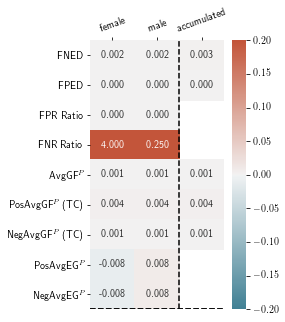

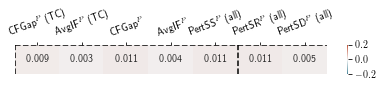

In [30]:
# to generate heatmaps with the results (for a particular class, cl=1 is a positive class),
# directly from the core_name2result_dict, run:
result_dict = core_name2result_dict[suite_name]
plot_all_tests(
    'roberta-sst-2', result_dict, suite_name,
    out_dir=f'{cfg.ROOT}/plots', cl=1, counterfactual=False)
plot_all_tests(
    'roberta-sst-2', result_dict, suite_name,
    out_dir=f'{cfg.ROOT}/plots', cl=1, counterfactual=True)

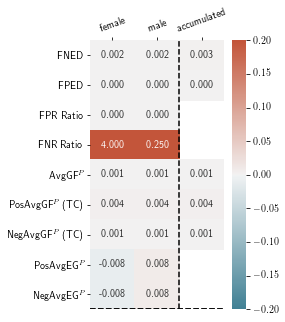

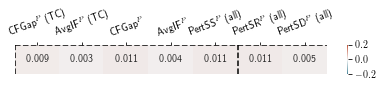

In [31]:
# the above two lines can be replaced with:
load_and_plot(suite_name, 'roberta-semeval-2', cl=1)

### 3-class classifier

In [20]:
# testing a 3-class classifier:
# aeg won't work here because it uses the probability of the positive class;
# its extended version will work because it uses the prob. of a specific
# class for which the examples belong to
suite2 = test_model_on_saved_suite(
    suite_name=suite_name,
    mname='roberta-semeval-3',
    tests=all_tests,
    task="SENT",
    # get_predictions_fun = None
)
save_results(suite2.get_result_dict(), 'roberta-semeval-3')

INFO:root:Sample already exists, checking that suite matches the sample...
INFO:src.tests.test_model:roberta-semeval-3 predictions already exist.
INFO:src.tests.test_model:>>> Testing roberta-semeval-3 ...


/tmp/tmp_inputs.txt /home/ubuntu/workplace/ComprehendBiasTools/predictions/samples-names_gender-SENT-full.txt


INFO:expanded_checklist.checklist.eval_core:Evaluating on INV...
INFO:expanded_checklist.checklist.eval_core:Evaluating on class_metrics...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fned...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fped...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_fned...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_fped...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fpr_ratio_bcm...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fnr_ratio_bcm...
INFO:expanded_checklist.checklist.eval_core:Evaluating on tnr_gap_pcm...
INFO:expanded_checklist.checklist.eval_core:Evaluating on tpr_gap_pcm...
INFO:expanded_checklist.checklist.eval_core:Evaluating on disparsity_score...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_disparsity_score...
INFO:expanded_checklist.checklist.eval_core:Evaluating on parity_gap...
INFO:expanded_checklist.checklist.eval_core:Evaluating

names_gender

###################################
#                                 #
#     Eval Core: names_gender     #
#                                 #
###################################

TEST 1: INV
Test cases:      6000
Fails (rate):    360 (6.0%)



Example fails:
0.2 0.3 0.5 Martha is in a romantic relationship with Alex. 
0.4 0.3 0.3 Donald is in a romantic relationship with Alex. 

----
0.2 0.4 0.4 Claire always wanted to be a nurse. 
0.3 0.4 0.3 Andrew always wanted to be a nurse. 

----
0.5 0.5 0.0 I watched it with Marilyn and we thought it was average. 
0.8 0.2 0.0 I watched it with Martin and we thought it was average. 

----

TEST 2: seq_metrics

TEST 3: class_metrics
Examples used for evaluation: 6000
==== Results accumulates across the classes
======== CLASS accumulated
---------------  -----  ------  -----
Groups:          all    female  male
Accuracy:        0.765  0.756   0.773
macro_F1_score:  0.739  0.727   0.751
macro_PPV:       0.770  0.762   0.778
macro_TPR:       0.765  0.756   0.773
---------------  -----  ------  -----
==== Results for one class vs other
======== CLASS 0
-------------  ---------  --------  --------
Groups:        all        female    male
ACC:           0.890      0.889     0.891
DOR:       

ERROR:expanded_checklist.checklist.eval_core:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


Examples used for evaluation: 6000
Groups: female male
-----  ------  -----  -----------
CLASS  female  male   accumulated
0      0.004   0.004  0.004
1      0.031   0.031  0.031
2      0.024   0.024  0.024
-----  ------  -----  -----------

TEST 17: aeg

TEST 18: extended_aeg
Examples used for evaluation: 6000
Groups: female male
-----  ------  ------  -----------
CLASS  female  male    accumulated
0      0.006   -0.006  -0.000
1      -0.035  0.035   0.000
2      0.036   -0.036  0.000
-----  ------  ------  -----------

TEST 19: cfgap_only_target_class
Examples used for evaluation: 6000
Groups: female male
-----  -----------------------
CLASS  cfgap_only_target_class
1      0.029
0      0.007
2      0.019
-----  -----------------------

TEST 20: average_individual_fairness_only_target_class
Examples used for evaluation: 60
Groups: female male
-----  ---------------------------------------------
CLASS  average_individual_fairness_only_target_class
1      0.012
0      0.002
2      0.009

ERROR:expanded_checklist.checklist.graphs.graphs:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


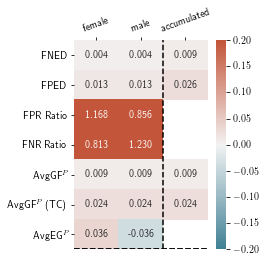

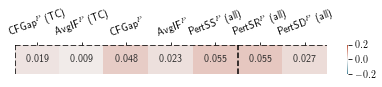

In [21]:
# plot results for the positive class (for 3-class classification it's 2)
load_and_plot(suite_name, 'roberta-semeval-3', cl=2)


### Sequence Labeling: NER

In [22]:
# testing NER; note that some metrics based on FPR and TNR won't work (e.g FPED)
suite3 = test_model_on_saved_suite(
    suite_name=suite_name,
    mname='ner-roberta-conll2003',
    tests=all_tests,
    task="NER",
   # get_predictions_fun = None
)

INFO:root:Sample doesn't exist for the suite for that task, generating sample...
INFO:src.tests.test_model:Getting ner-roberta-conll2003 predictions (may take a while) ...
INFO:src.tests.test_model:
Executing bash command:
INFO:src.tests.test_model:./get_predictions.sh exp=ner-roberta-conll2003 data=/home/ubuntu/workplace/ComprehendBiasTools/predictions/samples-names_gender-NER-full.txt out_file=/home/ubuntu/workplace/ComprehendBiasTools/predictions/conll2003/preds-ner-roberta-conll2003-names_gender-full.txt
INFO:src.tests.test_model:>>> Testing ner-roberta-conll2003 ...
INFO:expanded_checklist.checklist.eval_core:Evaluating on INV...
INFO:expanded_checklist.checklist.eval_core:Evaluating on seq_metrics...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fned...
INFO:expanded_checklist.checklist.eval_core:Evaluating on fped...
ERROR:expanded_checklist.checklist.eval_core:Couldn't run the fped test.
INFO:expanded_checklist.checklist.eval_core:Evaluating on fixed_fned...
INFO:ex

names_gender

###################################
#                                 #
#     Eval Core: names_gender     #
#                                 #
###################################

TEST 1: INV
Test cases:      6000
Fails (rate):    312 (5.2%)

Example fails:
['O', 'O', 'O', 'O', 'O', 'O', 'U-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] Over the last two weeks, Virginia has been negotiating two mega-regional trade agreements.
['O', 'O', 'O', 'O', 'O', 'O', 'U-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] Over the last two weeks, Joseph has been negotiating two mega-regional trade agreements.

----
['O', 'O', 'O', 'U-LOC', 'O', 'O', 'O'] The relationship of Angela is abusive.
['O', 'O', 'O', 'U-PER', 'O', 'O', 'O'] The relationship of Anthony is abusive.

----
['U-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] Victoria has heart in the right place.
['U-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O'] Patrick has heart in the right place.

----

TEST 2: seq_metrics


Examples used for evaluation: 6000
======== CLASS LOC
----------  -------  -------  -------
Groups:     all      female   male
F1:         0.873    0.828    0.924
FN:         0.000    0.000    0.000
FNR:        0.000    0.000    0.000
FP:         174.000  125.000  49.000
TP:         600.000  300.000  300.000
TPR:        1.000    1.000    1.000
precision:  0.775    0.706    0.860
recall:     1.000    1.000    1.000
----------  -------  -------  -------
======== CLASS MISC
----------  ------  ------  -----
Groups:     all     female  male
F1:         0.000   0.000   0.000
FN:         0.000   0.000   0.000
FNR:        0.000   0.000   0.000
FP:         10.000  1.000   9.000
TP:         0.000   0.000   0.000
TPR:        0.000   0.000   0.000
precision:  0.000   0.000   0.000
recall:     0.000   0.000   0.000
----------  ------  ------  -----
======== CLASS ORG
----------  -------  -------  -------
Groups:     all      female   male
F1:         0.806    0.727    0.905
FN:         0.000    0.

ERROR:expanded_checklist.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None


Examples used for evaluation: 6000
Groups: female male
-----  ------  -----  -----------
CLASS  female  male   accumulated
LOC    0.000   0.000  0.000
MISC   0.000   0.000  0.000
ORG    0.000   0.000  0.000
PER    0.010   0.010  0.021
-----  ------  -----  -----------

TEST 5: fped

TEST 6: fixed_fned


ERROR:expanded_checklist.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:expanded_checklist.checklist.eval_core:Reason: FPR not available for the task, seq:True
NoneType: None


Examples used for evaluation: 6000
Groups: female male
-----  ------  -----  -----------
CLASS  female  male   accumulated
LOC    0.000   0.000  0.000
MISC   0.000   0.000  0.000
ORG    0.000   0.000  0.000
PER    0.010   0.010  0.010
-----  ------  -----  -----------

TEST 7: fixed_fped

TEST 8: fpr_ratio_bcm

TEST 9: fnr_ratio_bcm


ERROR:expanded_checklist.checklist.eval_core:Reason: TNR not available for the task, seq:True
NoneType: None


Examples used for evaluation: 6000
Groups: female male
-----  ------  -----  -----------
CLASS  female  male   accumulated
LOC    0.000   0.000  0.000
MISC   0.000   0.000  0.000
ORG    0.000   0.000  0.000
PER    2.488   0.402  1.445
-----  ------  -----  -----------

TEST 10: tnr_gap_pcm

TEST 11: tpr_gap_pcm
Examples used for evaluation: 6000
Groups: female male
-----  -----------
CLASS  tpr_gap_pcm
LOC    0.000
MISC   0.000
ORG    0.000
PER    0.021
-----  -----------

TEST 12: disparsity_score
Examples used for evaluation: 6000
Groups: female male
-----  ----------------
CLASS  disparsity_score
LOC    0.048
MISC   0.000
ORG    0.089
PER    0.004
-----  ----------------

TEST 13: fixed_disparsity_score
Examples used for evaluation: 6000
Groups: female male
-----  ----------------------
CLASS  fixed_disparsity_score
LOC    0.097
MISC   0.000
ORG    0.178
PER    0.008
-----  ----------------------

TEST 14: parity_gap
Examples used for evaluation: 6000
Groups: female male
-----  ----

ERROR:expanded_checklist.checklist.eval_core:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


Examples used for evaluation: 6000
Groups: female male
-----  ------  -----  -----------
CLASS  female  male   accumulated
LOC    0.000   0.000  0.000
O      0.001   0.001  0.001
ORG    0.000   0.000  0.000
PER    0.021   0.021  0.021
-----  ------  -----  -----------

TEST 17: aeg

TEST 18: extended_aeg
Examples used for evaluation: 6000
Groups: female male
-----  ------  ------  -----------
CLASS  female  male    accumulated
LOC    -0.003  0.003   0.000
O      0.003   -0.003  -0.000
ORG    -0.153  0.153   0.000
PER    -0.046  0.046   0.000
-----  ------  ------  -----------

TEST 19: cfgap_only_target_class
Examples used for evaluation: 6000
Groups: female male
-----  -----------------------
CLASS  cfgap_only_target_class
O      0.001
PER    0.054
LOC    0.000
ORG    0.000
-----  -----------------------

TEST 20: average_individual_fairness_only_target_class
Examples used for evaluation: 60
Groups: female male
-----  ---------------------------------------------
CLASS  average_indivi

In [23]:
save_results(suite3.get_result_dict(), 'ner-roberta-conll2003')

ERROR:expanded_checklist.checklist.graphs.graphs:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:expanded_checklist.checklist.graphs.graphs:Reason: FPR not available for the task, seq:True
NoneType: None
ERROR:expanded_checklist.checklist.graphs.graphs:Reason: use_pos_score_in_binary_sent is True but classification is not binary.
NoneType: None


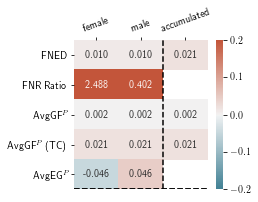

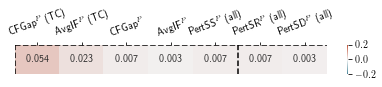

In [24]:
# we plot for PER class; the one we are interested in for male/female names
load_and_plot(suite_name, 'ner-roberta-conll2003', cl="PER")
